In [1]:
# Load and Clean the Data

# --------------------------------

# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Customer-Churn-Records.csv')

# Display the first 5 rows of the dataset
print("Initial rows of the dataset:")
print(df.head())

# Drop columns that do not affect churn prediction
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Convert categorical variables to category data type (for memory efficiency and preprocessing)
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 
                    'Complain', 'Card Type']

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Display the cleaned dataframe info
print("\nCleaned dataset info:")
print(df.info())

# Check class balance for the target variable
print("\nChurn distribution (target = 'Exited'):")
print(df['Exited'].value_counts(normalize=True))

# Save the cleaned version for future steps
df.to_csv("Customer-Churn-Cleaned.csv", index=False)
print("\n✅ Data cleaning complete. Cleaned file saved as 'Customer-Churn-Cleaned.csv'.")


Initial rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   

In [2]:
# Exploratory Data Analysis (EDA)
# ---------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('Customer-Churn-Cleaned.csv')

# Set Seaborn style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Overall Churn Rate
churn_rate = df['Exited'].mean()
print(f"Overall Churn Rate: {churn_rate:.2%}")

Overall Churn Rate: 20.38%


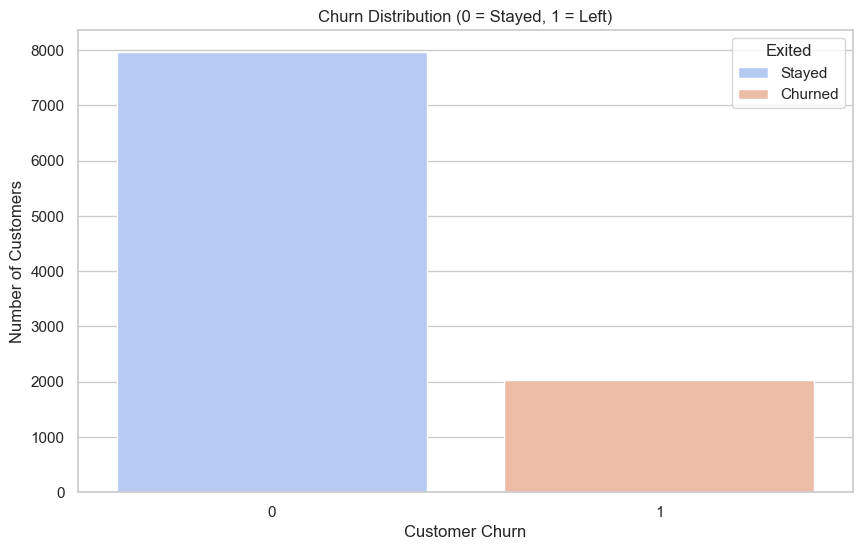

In [3]:
# Distribution of the target
sns.countplot(x='Exited', data=df, palette='coolwarm', hue='Exited')
plt.title('Churn Distribution (0 = Stayed, 1 = Left)')
plt.xlabel('Customer Churn')
plt.ylabel('Number of Customers')
plt.legend(title="Exited", labels=["Stayed", "Churned"])
plt.show()

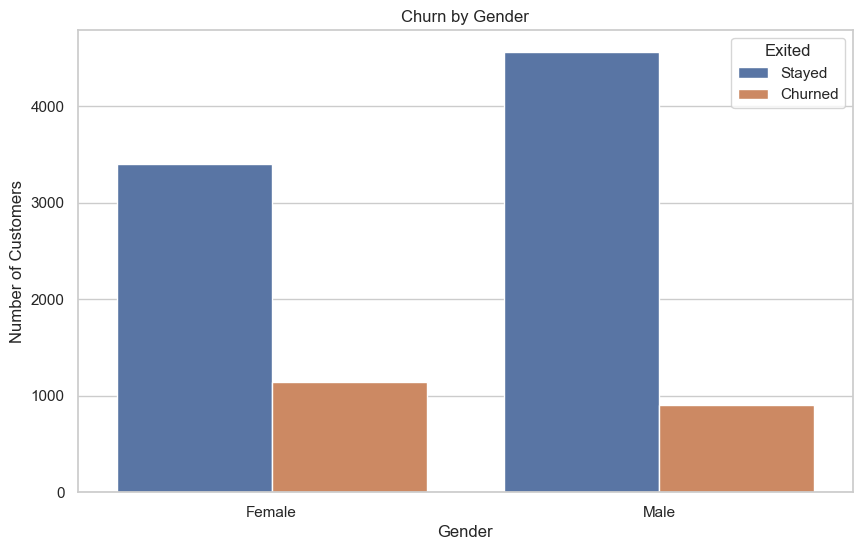

In [4]:
# Churn by Gender
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title="Exited", labels=["Stayed", "Churned"])
plt.show()

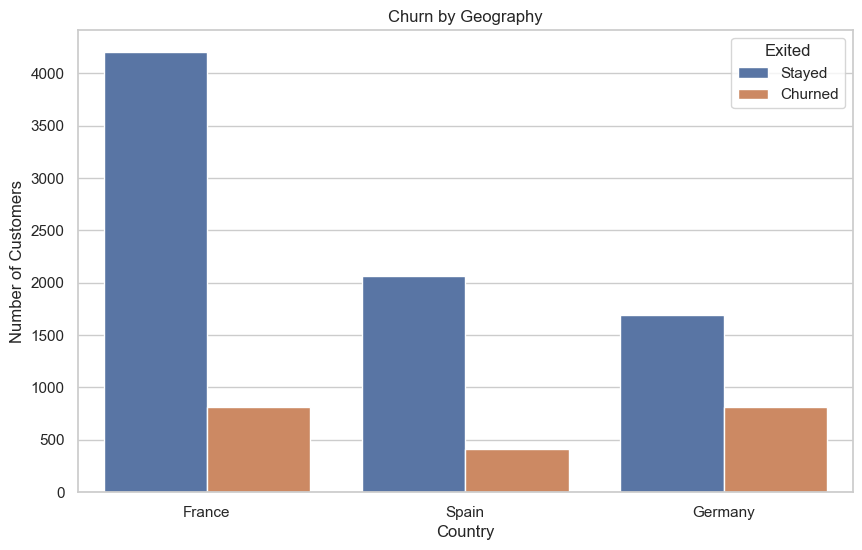

In [5]:
# Churn by Geography
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title("Churn by Geography")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.legend(title="Exited", labels=["Stayed", "Churned"])
plt.show()

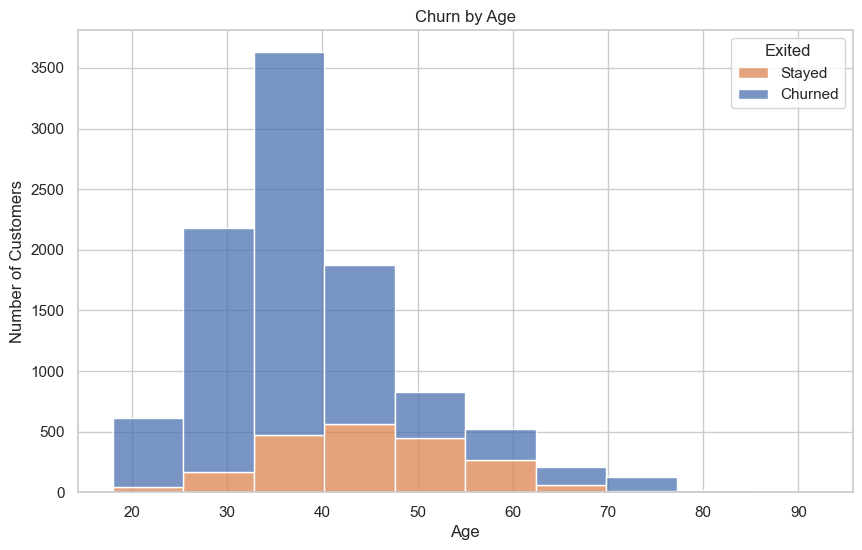

In [6]:
# Churn by Age
sns.histplot(data=df, x='Age', hue='Exited', bins=10, multiple='stack')
plt.title("Churn by Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend(title="Exited", labels=["Stayed", "Churned"])
plt.show()


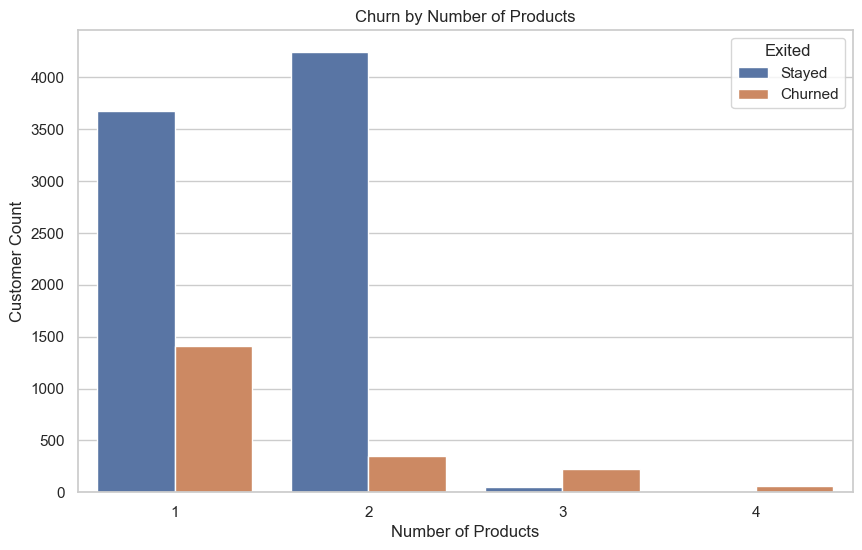

In [7]:
# Churn by Number of Products
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.title("Churn by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Customer Count")
plt.legend(title="Exited", labels=["Stayed", "Churned"])
plt.show()

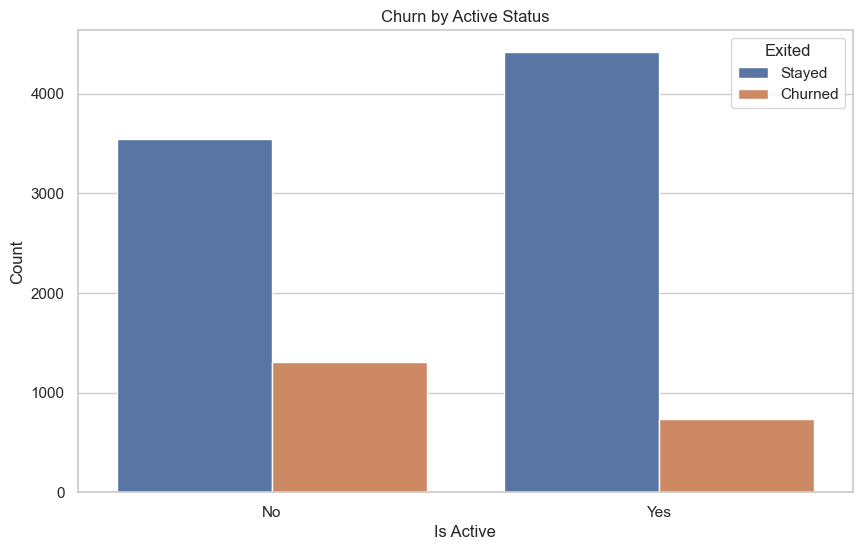

In [8]:
# Churn by Active Status
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title("Churn by Active Status")
plt.xlabel("Is Active")
plt.xticks([0, 1], ["No", "Yes"])
plt.ylabel("Count")
plt.legend(title="Exited", labels=["Stayed", "Churned"])
plt.show()

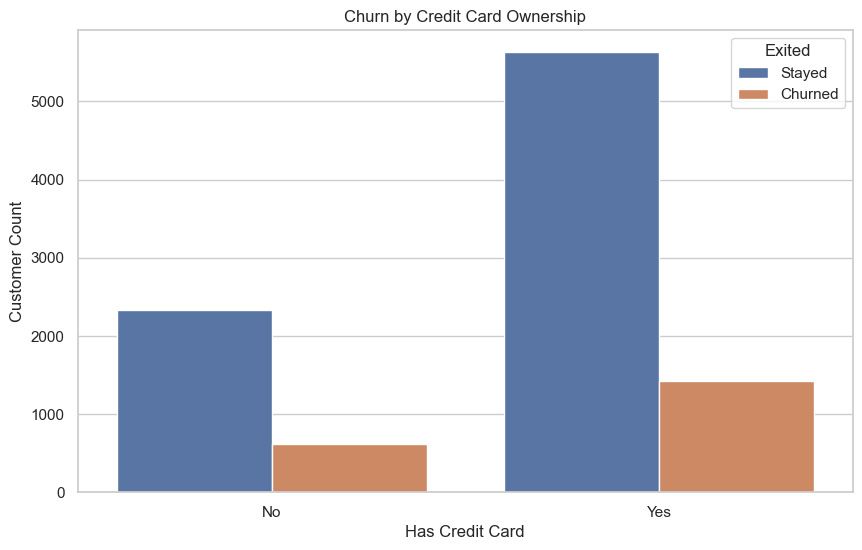

In [9]:
# Churn by Credit Card Ownership
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title("Churn by Credit Card Ownership")
plt.xlabel("Has Credit Card")
plt.xticks([0, 1], ["No", "Yes"])
plt.ylabel("Customer Count")
plt.legend(title="Exited", labels=["Stayed", "Churned"])
plt.show()


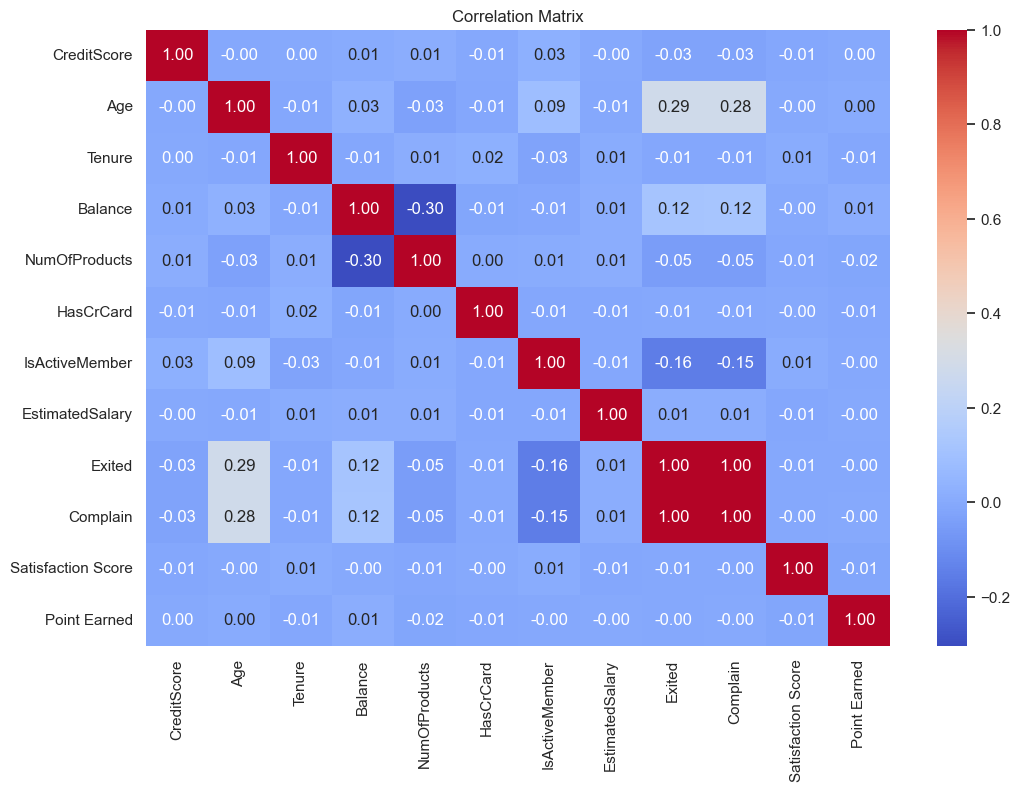

In [10]:
# Correlation Heatmap

corr = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

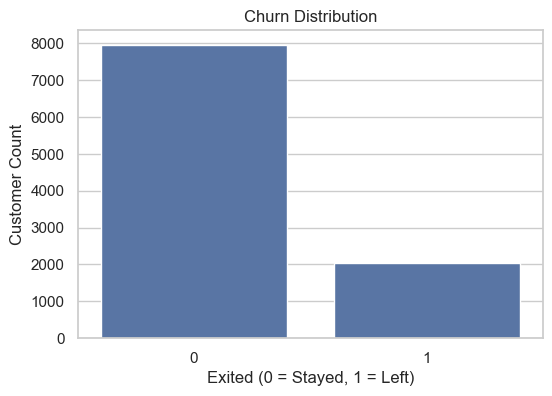

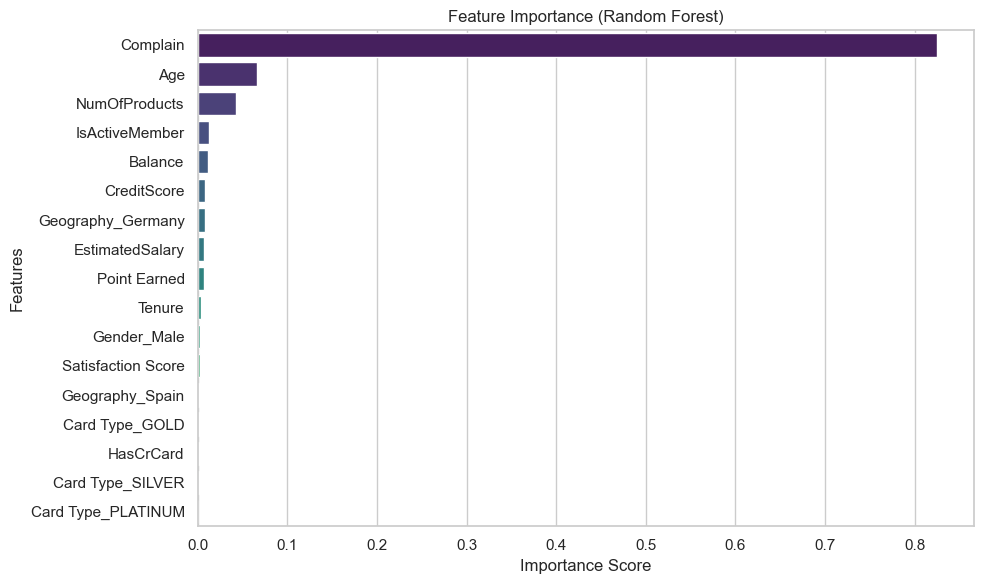


 Average churn rate by age group:
   AgeGroup    Exited
0    18–30  0.075026
1    31–40  0.121096
2    41–50  0.339655
3    51–60  0.562108
4      60+  0.247845

 Churn rate by complains:
 Complain
0    0.000503
1    0.995108
Name: Exited, dtype: float64

 Churn rate by Number of Products:
 NumOfProducts
1    0.277144
2    0.076035
3    0.827068
4    1.000000
Name: Exited, dtype: float64


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
df = pd.read_csv('Customer-Churn-Cleaned.csv')

# churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.xlabel('Exited (0 = Stayed, 1 = Left)')
plt.ylabel('Customer Count')
plt.show()

# Separate features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# Convert categorical columns into numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid dummy variable trap

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X_encoded.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis', hue=feature_importance.index, legend=False)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Analyze churn by age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18–30', '31–40', '41–50', '51–60', '60+'], right=True)
age_churn = df.groupby('AgeGroup', observed=False)['Exited'].mean().reset_index()
print("\n Average churn rate by age group:\n", age_churn)

# Analyze Churn rate by complains
complain_churn=df.groupby('Complain')['Exited'].mean()
print("\n Churn rate by complains:\n", complain_churn)

# Analyze Churn rate by Number of Products
NumOfProducts_churn=df.groupby('NumOfProducts')['Exited'].mean()
print("\n Churn rate by Number of Products:\n", NumOfProducts_churn)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Encoding Age Group as categorical and numeric
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18–30', '31–40', '41–50', '51–60', '60+'], right=True)
le_age = LabelEncoder()
df['AgeGroupEncoded'] = le_age.fit_transform(df['AgeGroup'].astype(str))

# Select features and target variable - use AgeGroupEncoded (numeric)
X = df[['Complain', 'AgeGroupEncoded', 'NumOfProducts']]
y = df['Exited']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1606    1]
 [   1  392]]


In [15]:
# Load the cleaned dataset
df = pd.read_csv('customer-churn-cleaned.csv')

# Create Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100],
                        labels=['18–30', '31–40', '41–50', '51–60', '60+'],
                        right=True, include_lowest=True)

# Encode AgeGroup to numeric
le_age = LabelEncoder()
df['AgeGroupEncoded'] = le_age.fit_transform(df['AgeGroup'].astype(str))

# Select features including the encoded AgeGroup instead of raw Age
X = df[['AgeGroupEncoded', 'NumOfProducts', 'Complain']]
y = df['Exited']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Add predicted churn probability to the original dataframe
df['Churn Probability'] = model.predict_proba(X)[:, 1]  # Probability of class 1 (Exited)
df['Churn Probability'] = (df['Churn Probability'] * 100).round(2)  # Percentage format

# Save the updated dataframe with churn probabilities to a CSV file
df.to_csv('customer_churn_full_with_probabilities.csv', index=False)

print("Done! Saved as 'customer_churn_full_with_probabilities.csv'")


Done! Saved as 'customer_churn_full_with_probabilities.csv'


In [16]:
# Load the dataset with probabilities
df = pd.read_csv('customer_churn_full_with_probabilities.csv')

# Exclude customers who already churned (Exited == 1)
df_active = df[df['Exited'] == 0]

# Sort active customers by churn risk descending
df_active_sorted = df_active.sort_values(by='Churn Probability', ascending=False)

# Save to CSV
df_active_sorted.to_csv('active_customers_churn_risk.csv', index=False)

print("Done! The file 'active_customers_churn_risk.csv' contains only active customers sorted by churn risk.")


Done! The file 'active_customers_churn_risk.csv' contains only active customers sorted by churn risk.
